In [55]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
#Read Dataset
df1 = pd.read_csv('KPMG1.csv', encoding = 'latin1')
df2 = pd.read_csv('KPMG2.csv', encoding = 'latin1')
df3 = pd.read_csv('KPMG3.csv', encoding = 'latin1')
df4 = pd.read_csv('KPMG4.csv', encoding = 'latin1')

C:\Users\hp\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hp\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hp\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Header Correction
nh1 = df1.iloc[0] 
df1 = df1[1:] 
df1.columns = nh1 
nh2 = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = nh2 
df22 = df2
nh3 = df3.iloc[0] 
df3 = df3[1:] 
df3.columns = nh3 
nh4 = df4.iloc[0] 
df4 = df4[1:] 
df4.columns = nh4 

In [4]:
#Retrive valid colums 
df1 = df1.iloc[:, :13]
df2 = df2.iloc[:, :16]
df3 = df3.iloc[:, :13]
df4 = df4.iloc[:, :6]
df22 = df22.iloc[:, 21:23]
df2 = df2.join(df22)

In [5]:
#Convert to lowercase 
df1 = df1.apply(lambda x: x.astype(str).str.lower())
df2 = df2.apply(lambda x: x.astype(str).str.lower())
df3 = df3.apply(lambda x: x.astype(str).str.lower())
df4 = df4.apply(lambda x: x.astype(str).str.lower())

In [6]:
#Check Missing Data
n1 = df1.isnull().sum()
n2 = df2.isnull().sum()
n3 = df3.isnull().sum()
n4 = df4.isnull().sum()
print("Missing Data in Transactions", n1)
print("\n")
print("Missing Data in New Customer List", n2)
print("\n")
print("Missing Data in Customer Demographic", n3)
print("\n")
print("Missing Data in Customer Address", n4)

Missing Data in Transactions 0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64


Missing Data in New Customer List 0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state   

In [7]:
df1['online_order'] = df1['online_order'].fillna(method='ffill')

In [8]:
df1['brand'] = df1['brand'].fillna(method='ffill')

In [9]:
df1['product_line'] = df1['product_line'].fillna(method='bfill')

In [10]:
df1['product_class'] = df1['product_class'].fillna(method='bfill')

In [11]:
df1['product_size'] = df1['product_size'].fillna(method='ffill')

In [12]:
df1['standard_cost'] = df1['standard_cost'].str.replace("$","")
df1['standard_cost'] = df1['standard_cost'].str.replace(",","")
df1['standard_cost'] = df1['standard_cost'].astype(float)

In [13]:
df1['standard_cost'] = df1['standard_cost'].fillna(df1['standard_cost'].mean())

In [14]:
df1['product_first_sold_date'] = df1['product_first_sold_date'].astype(float)
df1['product_first_sold_date'] = df1['product_first_sold_date'].fillna(df1['product_first_sold_date'].mean())

In [15]:
df2['last_name'] = df2['last_name'].fillna(method='ffill')

In [16]:
df2['DOB'] = df2['DOB'].fillna(method='ffill')

In [17]:
df2['job_title'] = df2['job_title'].fillna(method='bfill')

In [18]:
df2['job_industry_category'] = df2['job_industry_category'].fillna(method='bfill')

In [19]:
df3['last_name'] = df3['last_name'].fillna(method='ffill')

In [20]:
df3['DOB'] = df3['DOB'].fillna(method='ffill')

In [21]:
df3['job_title'] = df3['job_title'].fillna(method='bfill')

In [22]:
df3['job_industry_category'] = df3['job_industry_category'].fillna(method='ffill')

In [23]:
df3['tenure'] = df3['tenure'].astype(float)
df3['tenure'] = df3['tenure'].fillna(df1['product_first_sold_date'].mean())

In [24]:
#Delete Irrelevant Columns 
del df3['default']

In [25]:
#Check Duplicate Data
d1 = df1.duplicated()
d1 = d1.sum()
d2 = df2.duplicated()
d2 = d2.sum()
d3 = df3.duplicated()
d3 = d3.sum()
d4 = df4.duplicated()
d4 = d4.sum()
print("No Duplicate Data Found")

No Duplicate Data Found


In [26]:
#Join Dataframes - Customer Profiles
c = pd.merge(df3, df4, how = "inner", on = 'customer_id')

In [27]:
#Customer transactions 
ct = pd.merge(c, df1, how = "inner", on = "customer_id")

In [52]:
#Encoding
f = ct.apply(LabelEncoder().fit_transform)

In [54]:
#Describe Data
f.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,...,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000
mean,1749.912760,1416.508263,1654.424179,3.019732,48.223958,1555.242238,99.122045,4.393730,1.258964,0.000401,...,180.295022,1.001352,0.008914,3.343800,2.780699,1.559896,1.094802,143.506460,50.324269,49.994842
std,1007.920715,816.147473,928.184995,1.035945,29.005572,886.590900,51.537095,2.198796,0.823720,0.020013,...,104.988304,0.990994,0.093996,1.962319,0.663748,0.753429,0.875981,84.488467,28.926266,29.096337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,878.750000,699.750000,860.000000,2.000000,23.000000,802.000000,57.000000,2.000000,1.000000,0.000000,...,89.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,70.000000,26.000000,25.000000
50%,1748.500000,1428.000000,1698.000000,2.000000,47.000000,1562.000000,106.000000,5.000000,2.000000,0.000000,...,180.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,144.000000,50.000000,50.000000
75%,2626.000000,2120.000000,2423.000000,4.000000,73.000000,2310.000000,140.000000,6.000000,2.000000,0.000000,...,272.000000,2.000000,0.000000,5.000000,3.000000,2.000000,1.000000,223.000000,76.000000,75.000000
max,3488.000000,2834.000000,3263.000000,5.000000,99.000000,3047.000000,195.000000,9.000000,2.000000,1.000000,...,363.000000,2.000000,1.000000,6.000000,4.000000,3.000000,3.000000,295.000000,100.000000,100.000000


In [60]:
#Normalize Data
s = StandardScaler()
fs = pd.DataFrame(s.fit_transform(f))

Text(0, 0.5, 'Inertia')

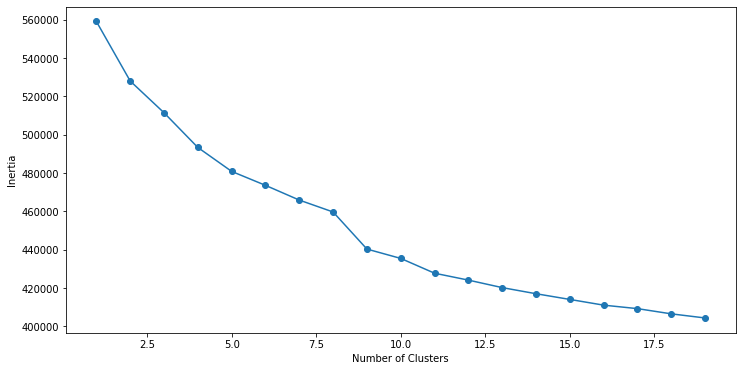

In [64]:
#KMeans Model
I = []
for cl in range(1, 20):
    kmeans = KMeans(n_clusters = cl, init = 'k-means++')
    fk = kmeans.fit(fs)
    I.append(kmeans.inertia_)
    
fi = pd.DataFrame({'#Cluster' : range(1, 20), "Inertia" : I})
plt.figure(figsize = (12, 6))
plt.plot(fi['#Cluster'], fi['Inertia'], marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [66]:
#Training and Testing
kmeans = KMeans(n_clusters = 10, init = "k-means++")
kmeans.fit(fs)
out = kmeans.predict(fs)

In [89]:
#Output
ct['cluster'] = out

In [121]:
#Groupby 
t = ct.set_index(['cluster', 'customer_id'])

In [123]:
#Final Output
final = t.sort_index()

In [124]:
final

0                   first_name   last_name  gender  \
cluster customer_id                                  
0       1              laraine   medendorp       f   
        1006           norbert     gotcher    male   
        1010          leighton      ebbles    male   
        1024            rhodia     d'onise  female   
        1026            vernon     hakking    male   
...                        ...         ...     ...   
9       891             talbot    andrioni    male   
        915            austina      orrice  female   
        926             terrel  matthisson    male   
        930            evelina       dinan  female   
        938          corabelle         nan  female   

0                   past_3_years_bike_related_purchases         DOB  \
cluster customer_id                                                   
0       1                                            93  1953-10-12   
        1006                                         15  1977-08-10   
        1010                                         24  1963-01-26   
        1024                                         17  1992-06-05   
        1026                                         66  1994-07-29   
...                                                 ...         ...   
9       891                                          21  1981-08-06   
        915                                          17  1984-09-07   
        926                                          18  1965-10-14   
        930                                          86  1971-11-10   
        938                                          18  1996-04-06   

0                                       job_title job_industry_category  \
cluster customer_id                                                       
0       1                     executive secretary                health   
        1006           quality control specialist    telecommunications   
        1010                                nurse    financial services   
        1024                        social worker                health   
        1026                                  nan    financial services   
...                                           ...                   ...   
9       891                occupational therapist                health   
        915          budget/accounting analyst iv         entertainment   
        926                             professor    telecommunications   
        930                   executive secretary                retail   
        938                      technical writer                retail   

0                       wealth_segment deceased_indicator owns_car  ...  \
cluster customer_id                                                 ...   
0       1                mass customer                  n      yes  ...   
        1006         affluent customer                  n      yes  ...   
        1010         affluent customer                  n       no  ...   
        1024            high net worth                  n      yes  ...   
        1026         affluent customer                  n       no  ...   
...                                ...                ...      ...  ...   
9       891             high net worth                  n      yes  ...   
        915              mass customer                  n       no  ...   
        926          affluent customer                  n       no  ...   
        930              mass customer                  n      yes  ...   
        938              mass customer                  n       no  ...   

0                    transaction_date online_order order_status  \
cluster customer_id                                               
0       1                   3/27/2017        false     approved   
        1006                2/13/2017        false     approved   
        1010                1/10/2017         true     approved   
        1024               11/12/2017         true     approved   
        1026       

In [46]:
final.to_csv("KPMG Final.csv")